In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import viridis

In [ ]:
# Charger les données depuis le fichier Excel
excel_file_path = '../BDD/data_fifa_clean.xlsx'
df = pd.read_excel(excel_file_path)

In [ ]:
# Critères de compétences
competences = ['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 
               'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed',
               'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
               'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
               'Composure', 'Marking', 'StandingTackle', 'SlidingTackle']

# Ajouter une colonne 'TotalCompetences' représentant la somme des compétences pour chaque joueur
df['TotalCompetences'] = df[competences].sum(axis=1)

# Sélectionner les 20 premières nationalités
top_20_nationalites = df['Nationality'].value_counts().head(20).index
df_top_20 = df[df['Nationality'].isin(top_20_nationalites)]

# Création d'une colormap en fonction de 'TotalCompetences'
norm = Normalize(vmin=df_top_20['TotalCompetences'].min(), vmax=df_top_20['TotalCompetences'].max())
colors = viridis(norm(df_top_20['TotalCompetences']))

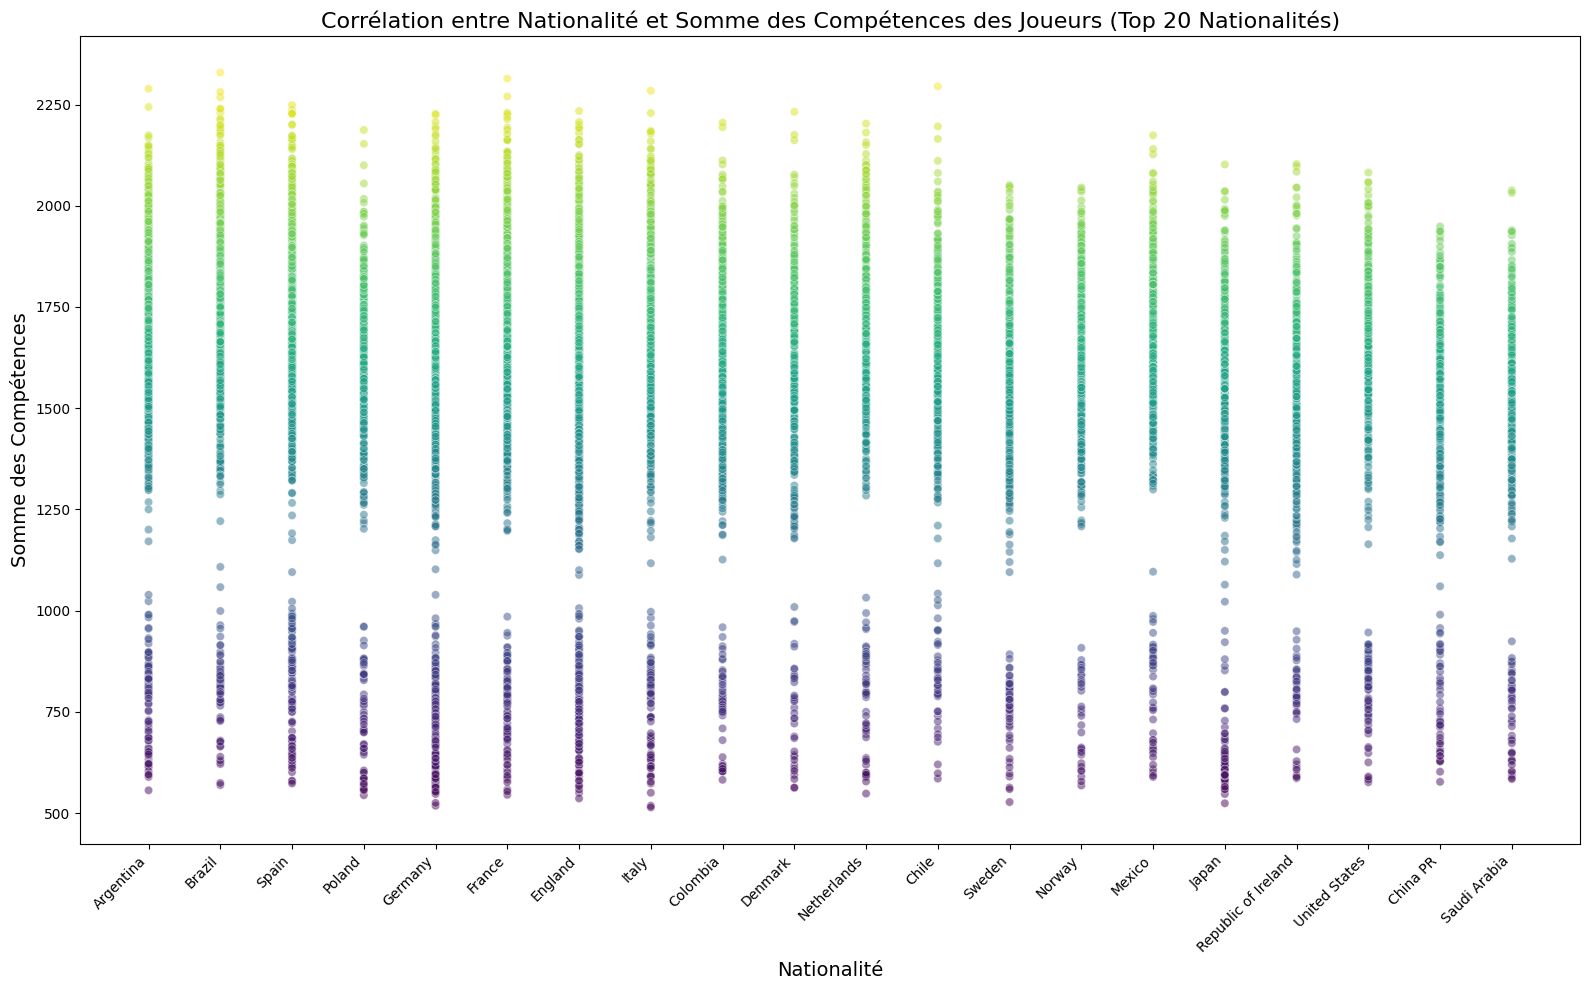

In [1]:
# Paramètres du graphique de dispersion
plt.figure(figsize=(16, 10))

# Création du graphique de dispersion
plt.scatter(df_top_20['Nationality'], df_top_20['TotalCompetences'], alpha=0.5, c=colors, edgecolors='w', linewidth=0.5)

# Configuration des étiquettes
plt.xlabel('Nationalité', fontsize=14)
plt.ylabel('Somme des Compétences', fontsize=14)
plt.title('Corrélation entre Nationalité et Somme des Compétences des Joueurs (Top 20 Nationalités)', fontsize=16)

# Ajustement des espaces entre les barres
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Affichage du graphique
plt.show()
